<a href="https://colab.research.google.com/github/NicolasPham/DataAnalystProjects/blob/main/BritishAirline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

### About the data
This is the British Airways dataset taken from the official review site SkyTraX. This data set is not cleaned so do clean it.

This dataset is for anyone who wishes to learn data cleaning and data transformation.

### 1. Data Load And Clean up

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/airline_review.csv')
df.head()

,Unnamed: 0,rating,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,I take comfort in reading the last ten or so...,NaN,Couple Leisure,Business Class,Athens to London,2023-09-01,1,1,1,1,1,no,1,Verified


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           3616 non-null   int64 
 1   rating               3616 non-null   int64 
 2   header               3616 non-null   object
 3   author               3616 non-null   object
 4   date                 3616 non-null   object
 5   place                3616 non-null   object
 6   content              3616 non-null   object
 7   aircraft             1902 non-null   object
 8   traveller_type       2895 non-null   object
 9   seat_type            3614 non-null   object
 10  route                2891 non-null   object
 11  date_flown           2888 non-null   object
 12  seat_comfort         3616 non-null   int64 
 13  cabin_staff_service  3616 non-null   int64 
 14  food_beverages       3616 non-null   int64 
 15  ground_service       3616 non-null   int64 
 16  value_

In [ ]:
# Drop unneccessary columns
df = df.drop(columns = ['content'])

In [ ]:
# There is missing values in some column
missing_values = df.isnull().sum()

In [ ]:
# Convert date, date_flown to datetime format
df['date'] = pd.to_datetime(df['date'])
df['date_flown'] = pd.to_datetime(df['date_flown'])

In [ ]:
# Fill in missing values
# For category data like aircraf, traveller_type, seat_type, route, trip_verified
# We can replace missing value with value 'unknown' so that we do not impute potentially misleading information
cat_missing_columns = ['aircraft', 'traveller_type', 'seat_type', 'route', 'trip_verified']
for column in cat_missing_columns:
  df[column].fillna('unknown', inplace = True)

### 2. EDA (Exploratory Data Analyses)

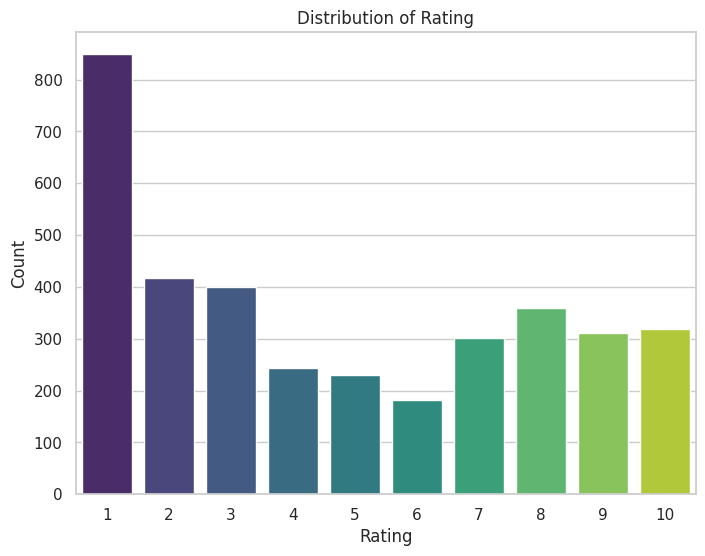

In [ ]:
# Distribution of Rating
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'rating', palette = 'viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating')
plt.show()

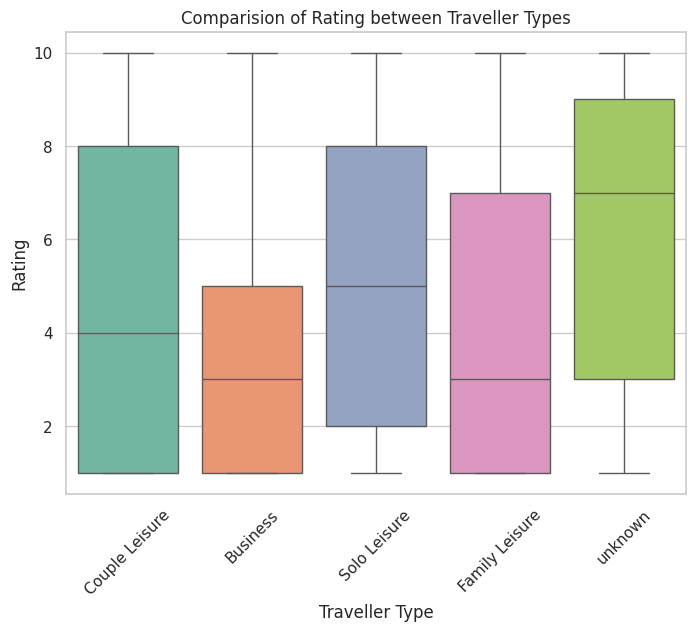

In [ ]:
# Compare rating by traveller type
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'traveller_type', y = 'rating', palette = 'Set2')
plt.xlabel('Traveller Type')
plt.ylabel('Rating')
plt.title('Comparision of Rating between Traveller Types')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df.head()

,Unnamed: 0,rating,header,author,date,place,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,unknown,Couple Leisure,Business Class,Athens to London,2023-09-01,1,1,1,1,1,no,1,Verified
